In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.decomposition import PCA
from time import perf_counter

In [2]:
def plot_gallery_withNames(images,labels,classes):
  # Affiche les 12 premières images contenues dans images
  # images est de taille Nb image*Ny*Nx
  plt.figure(figsize=(7.2, 7.2))
  plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35)
  for i in range(12):
    plt.subplot(3, 4, i + 1)
    plt.imshow(images[i], cmap=plt.cm.gray)
    plt.title(classes[labels[i]])
    plt.xticks(())
    plt.yticks(())
  plt.show() 


def plot_gallery(images):
  # Affiche les 12 premières images contenues dans images
  plt.figure(figsize=(7.2, 7.2)) 
  plt.subplots_adjust(bottom=0, left=.01, right=.99, top=.90, hspace=.35) 
  for i in range(12): 
    plt.subplot(3, 4, i + 1) 
    plt.imshow(images[i], cmap=plt.cm.gray) 
    plt.xticks(()) 
    plt.yticks(()) 
  plt.show()

In [3]:
[X, y, name]=np.load("TP1.npy",allow_pickle=True )


X représente les features, y les labels et name le nom des classes

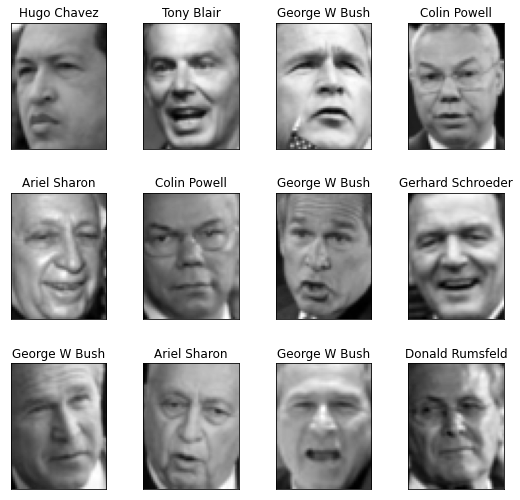

In [4]:
plot_gallery_withNames(X,y,name)

In [5]:

#La taille de l'image
tailleImage = X[0].shape; 
print(f'La taille de l\'image est : {tailleImage}')

#Le nombre d'images
nbImages = len(X)
print(f'Le nombre d\'images : {nbImages}')

#Le nombre de classes
nbClasses = len(name)
print(f'Le nombre de classes = {nbClasses} : {name}')

La taille de l'image est : (62, 47)
Le nombre d'images : 1288
Le nombre de classes = 7 : ['Ariel Sharon' 'Colin Powell' 'Donald Rumsfeld' 'George W Bush'
 'Gerhard Schroeder' 'Hugo Chavez' 'Tony Blair']


Text(0, 0.5, 'count')

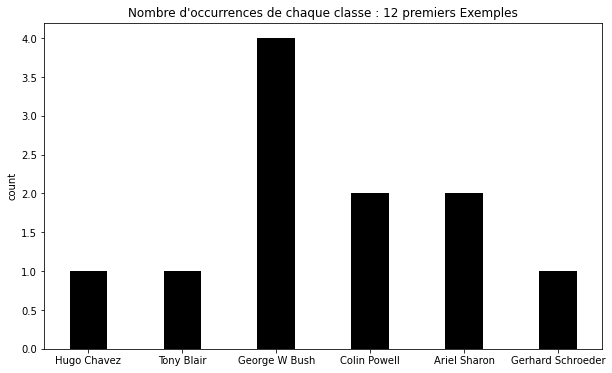

In [6]:
plt.figure(figsize=(10, 6)) 
plt.hist(name[y[0 : 11]].flatten(), bins=range(7),align ='left', rwidth=0.4,color='k')
plt.title('Nombre d\'occurrences de chaque classe : 12 premiers Exemples')
#plt.xlabel('classes')
plt.ylabel('count')
#plt.grid()

Nous remarquons que les classes ne sont pas equiprobables.


Text(0, 0.5, 'count')

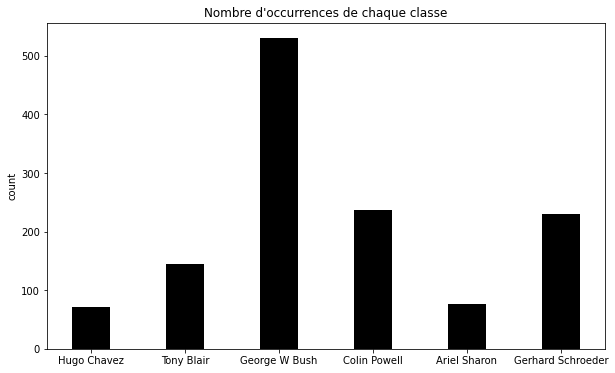

In [7]:
plt.figure(figsize=(10, 6)) 
plt.hist(name[y[0 : nbImages]].flatten(), bins=range(7),align ='left', rwidth=0.4,color='k')
plt.title('Nombre d\'occurrences de chaque classe')
plt.ylabel('count')

In [8]:
for i,classe in enumerate(name):
  labelsList = list(y)
  nbExemples = labelsList.count(i)
  print(f'Le nombre d\'exemple dans la class < {classe} >  = {nbExemples}')

Le nombre d'exemple dans la class < Ariel Sharon >  = 77
Le nombre d'exemple dans la class < Colin Powell >  = 236
Le nombre d'exemple dans la class < Donald Rumsfeld >  = 121
Le nombre d'exemple dans la class < George W Bush >  = 530
Le nombre d'exemple dans la class < Gerhard Schroeder >  = 109
Le nombre d'exemple dans la class < Hugo Chavez >  = 71
Le nombre d'exemple dans la class < Tony Blair >  = 144



**Partitionnement de la base d’apprentissage** : 
Partitionner la base en une base d’apprentissage et une base de test en mettant 25% des données en test (fonction train_test_split()) pour obtenir les variables X_train, X_test, y_train et y_test

In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42)

# Combien y a-t-il d’images en train et en test ?
print(f'Le nombre d\'images pour l\'apprentissage : {len(X_train)}')
print(f'Le nombre d\'images pour le test : {len(X_test)}')


Le nombre d'images pour l'apprentissage : 966
Le nombre d'images pour le test : 322


## **II. Prétraitement des données** 

---



**Redimensionnement des données** : Pour réaliser une classification par kppv, on utilise un codage rétinien. Chaque image est donc
représentée par un vecteur de dimension 2914. Redimensionner X_train et X_test de façon à ce
qu’ils aient pour dimension Nb_exemple x 2914

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,random_state=42)

print(f'Dimensionnement de X_train avant le redimensionnment : {np.shape(X_train)}')
print(f'Dimensionnement de X_test  avant le redimensionnment : {np.shape(X_test)}')

X_train = np.reshape(X_train,(X_train.shape[0],X_train.shape[1]*X_train.shape[2]))
X_test = np.reshape(X_test,(X_test.shape[0],X_test.shape[1]*X_test.shape[2]))

print(f'\nDimensionnement de X_train après le redimensionnment : {np.shape(X_train)}')
print(f'Dimensionnement de X_test  après le redimensionnment : {np.shape(X_test)}')


Dimensionnement de X_train avant le redimensionnment : (966, 62, 47)
Dimensionnement de X_test  avant le redimensionnment : (322, 62, 47)

Dimensionnement de X_train après le redimensionnment : (966, 2914)
Dimensionnement de X_test  après le redimensionnment : (322, 2914)


**Mise en forme des données pour la classification**  : Mettre en forme les données (train et test) en utilisant la fonction classe StandardScaler

Standardization of datasets is a common requirement for many machine learning estimators implemented in scikit-learn

Standardize features by removing the mean and scaling to unit variance.
The standard score of a sample x is calculated as:

z = (x - u) / s

where u is the mean of the training samples or zero if with_mean=False, and s is the standard deviation of the training samples or one if with_std=False.

Centering and scaling happen independently on each feature by computing the relevant statistics on the samples in the training set. Mean and standard deviation are then stored to be used on later data using transform.

StandardScaler() : Technique de mise à l'échelle 

    $(xi - mean(x))/stdev(x)$

mean(x) : Moyenne

stdev(x) : « Standard Deviation »


In [11]:
scaler = StandardScaler();
#print(X_train[0])

# Calcul de la moyenne et de l'ecart type
scaler.fit(X_train)
#print(scaler.mean_)

# Normalisation des données par rapport à X_Train
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

# Scaled data has zero mean and unit variance:
print("X_train_scaled.mean(axis=0) = ",X_train.mean(axis=0))
print("X_train_scaled.std(axis=0) = ", X_train.std(axis=0))

print("\nX_test_scaled.mean(axis=0) = ",X_test.mean(axis=0))
print("X_test_scaled.std(axis=0) = ", X_test.std(axis=0))

X_train_scaled.mean(axis=0) =  [ 1.1476671e-08  1.0119215e-08 -1.5919253e-08 ...  1.0983051e-08
 -1.4438392e-08  1.4808608e-09]
X_train_scaled.std(axis=0) =  [1.0000002  0.9999998  0.99999964 ... 1.0000001  0.99999946 0.99999964]

X_test_scaled.mean(axis=0) =  [-0.0276855  -0.03340848 -0.03209007 ... -0.03164582 -0.04579046
 -0.0620914 ]
X_test_scaled.std(axis=0) =  [1.0024064  0.97700125 0.977229   ... 0.9521843  0.934255   0.940244  ]


In [12]:
print(len(X_train))

966


## **III. Classification par lesKPPV**


---
###**Classifieur 1PPV** :
Définir le classifieur 1PPV en utilisant la classe KNeighborsClassifier(). On souhaite utiliser la
distance euclidienne et le 1PPV.

*sklearn.neighbors.KNeighborsClassifier(n_neighbors=5, *, weights='uniform', algorithm='auto', leaf_size=30, p=2, metric='minkowski', metric_params=None, n_jobs=None)*

Classifier implementing the k-nearest neighbors vote.


*p : int, default=2
Power parameter for the Minkowski metric. When p = 1, this is equivalent to using manhattan_distance (l1), and euclidean_distance (l2) for p = 2. For arbitrary p, minkowski_distance (l_p) is used.*

In [13]:


classifier = KNeighborsClassifier(n_neighbors=1,p=2)
classifier.fit(X_train,y_train)

# Réaliser la classification des exemples de test en utilisant la méthode predict()
y_pred = classifier.predict(X_test)

# Afficher la matrice de confusion : Compute confusion matrix to evaluate the accuracy of a classification.
C = confusion_matrix(y_test,y_pred)

"""y_test : array-like of shape (n_samples,)
Ground truth (correct) target values.

y_pred : array-like of shape (n_samples,)
Estimated targets as returned by a classifier."""

print(C)

# La somme des éléments de la diagonale divisée par la somme des éléments
print("\nTaux de reconnaissance ",np.sum(np.diag(C))/np.sum(C)*100)

[[  5   1   0   4   2   1   0]
 [  2  31   4  12   4   3   4]
 [  3   5  15   4   0   0   0]
 [  2   5   9 102   6   7  15]
 [  1   2   3   5   9   1   4]
 [  0   1   0   4   2   8   0]
 [  1   3   2  10   2   2  16]]

Taux de reconnaissance  57.7639751552795


**Que représente la matrice de confusion ?** 

*La matrice de confusion est en quelque sorte un résumé des résultats de prédiction pour un problème particulier de classification. Elle compare les données réelles pour une variable cible à celles prédites par un modèle.*

**Que vaut sa somme ?** 
*La somme de la matrice represente le nombre d’exemples de la base de test*


**Est-ce que les classes sont équilibrées ?**

*Non, les classes ne sont pas équilibrées*


### **Classifieur KPPV** : 
Faire varier le K des KPPV et tracer l’évolution du taux de reconnaissance

###**Classifieur KPPV et distance de Manhattan** :

# **TP2 – Analyse en composantes principales, classification et reconstruction**

### 1 - Chargement et mise en forme des données : 

Combien y a-t-il de données en apprentissage et en test ?

Quelle est la dimension des données après redimensionnement ?

In [14]:
print("Le nombre de donnée dans le set d'apprentissage  = ",len(X_train))
print("Le nombre de donnée dans le set de test = ",len(X_test))

print(f'\nDimensionnement de X_train après le redimensionnment : {np.shape(X_train)}')
print(f'Dimensionnement de X_test  après le redimensionnment : {np.shape(X_test)}')


Le nombre de donnée dans le set d'apprentissage  =  966
Le nombre de donnée dans le set de test =  322

Dimensionnement de X_train après le redimensionnment : (966, 2914)
Dimensionnement de X_test  après le redimensionnment : (322, 2914)


## **II. Analyse en composantes principales et classification**

Principal component analysis (PCA).

***class sklearn.decomposition.PCA(n_components=None, *, copy=True, whiten=False, svd_solver='auto', tol=0.0, iterated_power='auto', random_state=None)***

***n_components : int, float or ‘mle’, default=None
Number of components to keep. if n_components is not set all components are kept:*** 

Linear dimensionality reduction using Singular Value Decomposition of the data to project it to a lower dimensional space. The input data is centered but not scaled for each feature before applying the SVD.



### **Methods**
**fit(X[, y])** : Fit the model with X.

**fit_transform(X[, y])** : Fit the model with X and apply the dimensionality reduction on X.

**get_covariance()** : Compute data covariance with the generative model.

**get_params([deep])** : Get parameters for this estimator.

**get_precision()** : Compute data precision matrix with the generative model.

**inverse_transform(X)** : Transform data back to its original space.

**score(X[, y])** : Return the average log-likelihood of all samples.

**score_samples(X)** : Return the log-likelihood of each sample.

**set_params(params)** : Set the parameters of this estimator.

**transform(X)** : Apply dimensionality reduction to X.

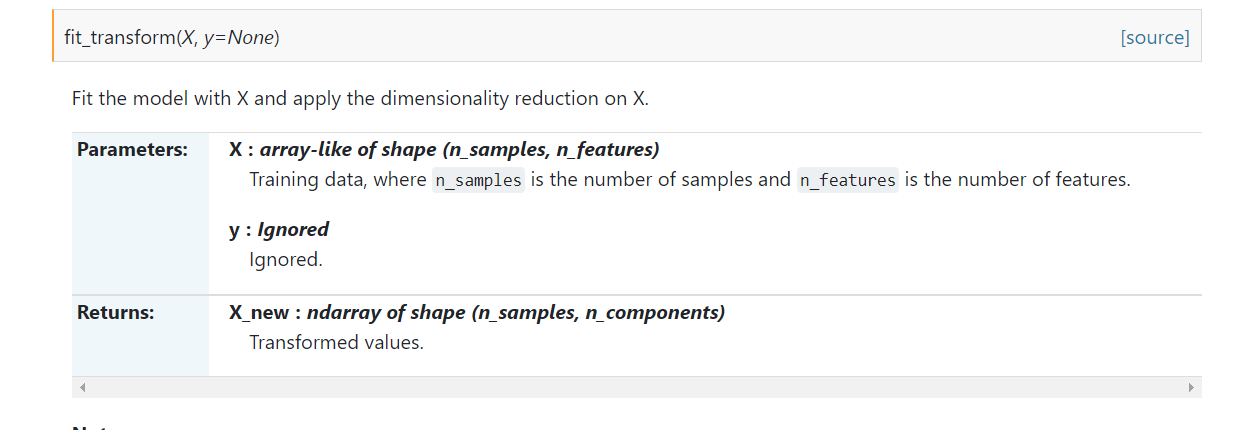

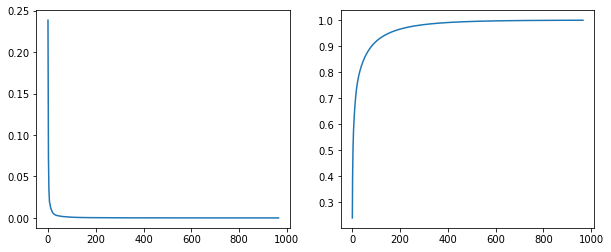

In [15]:
# n_components : le nombre d'axes à conserver (par défaut, tous) : Number of components to keep. if n_components is not set all components are kept.
n_components = np.size(X_train,0) # pick the maximum components

pca  = PCA(n_components = n_components )  #Instanciate PCA
#pca  = PCA() 

""" PCA is an estimator and by that you need to call the fit() method in order to calculate the principal components
and all the statistics related to them, such as the variances of the projections en hence the explained_variance_ratio."""
pca.fit(X_train) #ajuster le modèle sur X_train

#print(pca.explained_variance_ratio_)

plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
plt.plot(pca.explained_variance_ratio_)
plt.subplot(1,2,2)
plt.plot(pca.explained_variance_ratio_.cumsum())



In [16]:
print("The sum of the ratios is equal to : ", sum(pca.explained_variance_ratio_))

The sum of the ratios is equal to :  0.9999998727821681


Percentage of variance explained by each of the selected components.If n_components is not set then all components are stored and the sum of the ratios is equal to 1.0. Indicating that the 966 principal components together explain 100% of the variance of the data.

[PCA Explained Variance Concepts with Python Example](https://vitalflux.com/pca-explained-variance-concept-python-example/)

Same thing with 100 components


The sum of the ratios is equal to :  0.9999998727821681


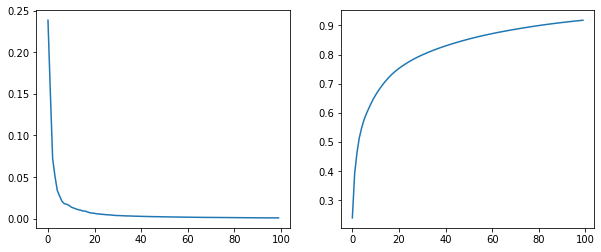

In [17]:
n_components = 100 # pick 100 components
pca2  = PCA(n_components = n_components )  #Instanciate PCA
pca2.fit(X_train)

plt.figure(figsize=(10, 4))
plt.subplot(1,2,1)
plt.plot(pca2.explained_variance_ratio_)
plt.subplot(1,2,2)
plt.plot(pca2.explained_variance_ratio_.cumsum())

print("The sum of the ratios is equal to : ", sum(pca.explained_variance_ratio_))

Using PCA for dimensionality reduction involves zeroing out one or more of the smallest principal components, resulting in a lower-dimensional projection of the data that preserves the maximal data variance.

Here is an example of using PCA as a dimensionality reduction transform


In [18]:
X_train_pca = pca2.transform(X_train)
X_test_pca = pca2.transform(X_test)

print("original shape train Data:   ", X_train.shape)
print("transformed shape train Data:", X_train_pca.shape)

print("\noriginal shape test Data:   ", X_test.shape)
print("transformed shape test Data:", X_test_pca.shape)



original shape train Data:    (966, 2914)
transformed shape train Data: (966, 100)

original shape test Data:    (322, 2914)
transformed shape test Data: (322, 100)


We can seen that the  transformed data has been reduced to 966 dimension.

Réaliser la classification sur les données de départ puis sur les nouvelles données avec la
méthode du 5PPV et la distance de Manhattan

Cette applicationde la méthode PCA, consiste à l'extraction de caractéristiques.L'idée est qu'il est possible de trouver une representation des donnes qui soit mieux adaptée à l'analyse que le format brut qui nous a été fourni. Dans notre analyse d'images numériques. En utilisant un plus proche voisin, calculer les distancesentre les pixels d'origine n'est pas vraiment une bonne façon de mesurer les similitudes entre visages.Lorsque nous faisons appel à une representation sous forme de pixels pour comparer deux images, nous comparons en fait la valeur de niveau de gris de chaque pixel individuel à la valeur correspondante pour le pixel qui occupe la meme position dans l'autre image.Cette representation est tout à fait différente de la manière dont des etres humains interpréteraient la vue d'un visage, et il est doncdifficile de captyrer ce qui consiste un visage particulier en utilisant des données qui se présenteteraient sous cette forme.



In [19]:
knn = KNeighborsClassifier(n_neighbors=5,p=1) #p=2 : When p = 1, this is equivalent to using manhattan_distance
knn.fit(X_train,y_train)

# Grab Currrent Time Before Running the Code
tps1 = perf_counter()

# Réaliser la classification des exemples de test en utilisant la méthode predict()
y_pred = knn.predict(X_test)

# Grab Currrent Time After Running the Code
tps2 = perf_counter()

# Afficher la matrice de confusion : Compute confusion matrix to evaluate the accuracy of a classification.
C = confusion_matrix(y_test,y_pred)
print(C)
# La somme des éléments de la diagonale divisée par la somme des éléments
print("\nTaux de reconnaissance ",np.sum(np.diag(C))/np.sum(C)*100)
print("Test set accuracy : {:.2f} ".format(knn.score(X_test, y_test)))

#Subtract Start Time from The End Time
total_time = tps2 - tps1
print("\nDurée de classification",total_time)


[[  5   6   1   1   0   0   0]
 [  1  44   0  14   1   0   0]
 [  3   2  16   6   0   0   0]
 [  2   9   4 128   1   0   2]
 [  2   1   4  11   4   0   3]
 [  0   5   0   6   0   4   0]
 [  0   5   0  15   3   0  13]]

Taux de reconnaissance  66.45962732919256
Test set accuracy : 0.66 

Durée de classification 1.2115452410000103


In [20]:
knn = KNeighborsClassifier(n_neighbors=5,p=1) #p=2 : When p = 1, this is equivalent to using manhattan_distance
knn.fit(X_train_pca,y_train)

# Grab Currrent Time Before Running the Code
tps1 = perf_counter()

# Réaliser la classification des exemples de test en utilisant la méthode predict()
y_pred = knn.predict(X_test_pca)

# Grab Currrent Time After Running the Code
tps2 = perf_counter()

# Afficher la matrice de confusion : Compute confusion matrix to evaluate the accuracy of a classification.
C = confusion_matrix(y_test,y_pred)
print(C)
# La somme des éléments de la diagonale divisée par la somme des éléments
print("\nTaux de reconnaissance ",np.sum(np.diag(C))/np.sum(C)*100)
print("Test set accuracy : {:.2f} ".format(knn.score(X_test_pca, y_test)))

#Subtract Start Time from The End Time
total_time = tps2 - tps1
print("\nDurée de classification",total_time)


[[  7   3   1   2   0   0   0]
 [  1  44   2  12   1   0   0]
 [  2   4  15   6   0   0   0]
 [  1   3   9 131   1   0   1]
 [  1   2   3   9   6   0   4]
 [  1   3   0   5   2   4   0]
 [  1   4   1  13   2   0  15]]

Taux de reconnaissance  68.94409937888199
Test set accuracy : 0.69 

Durée de classification 0.038114600999989534


Notre exactitudes'est amélioréé de manière assez significative, de 66% à 70%, ce qui confirme notre intuition que les composantes principales pourraient fournir une meilleure représentation des données.

## **III. Analyse en composantes principales et reconstruction**

Le but est de compresser les images afin qu’elle prenne moins de place en mémoire. On va donc
définir sur X_train la façon de compresser. Puis on comprimera et décomprimera les images de
X_test afin de voir les pertes induites par la compression.

1. Définissez la décomposition en composantes principales en utilisant la fonction PCA()
en conservant 50 composantes et ajuster le modèle sur X_train

Pour les données images, nous pourrons facilement visualiser les composantes principales qui ont été trouvées.Sachant que ces composantes correspondent à des directions dans l'éspace d'entrée.Celui-ci est formé dans cet exemple d'images en niveaux de gris 62*47 pixels, et donc les directions dans cet espace sont également des images en niveaux de gris de 62*47 pixels.

In [38]:
pca3  = PCA(n_components = 50 )  #Instanciate PCA
pca3.fit(X_train)

X_train_pca3 = pca3.transform(X_train)
X_test_pca3 = pca3.transform(X_test)

eigenvectors = pca3.components_
print("pca.components_shape: {}".format(pca3.components_.shape))
print("Sachant qu'on a choisi de garder 50 composantes lors de la décomposition, on trouve donc bien ",len(eigenvectors),"eigenvectors.")

pca.components_shape: (50, 2914)
Sachant qu'on a choisi de garder 50 composantes lors de la décomposition, on trouve donc bien  50 eigenvectors.


2. Récupérer les vecteurs propres en utilisant un attribut de PCA(). Redimensionner les
vecteurs propres en images propres (np.reshape()) de manière à pourvoir les visualiser
sous forme d’images (array de taille 50x62x47). On utilisera la fonction plot_gallery()
pour la visualisation.


eigenvectors_shape: (50, 62, 47)


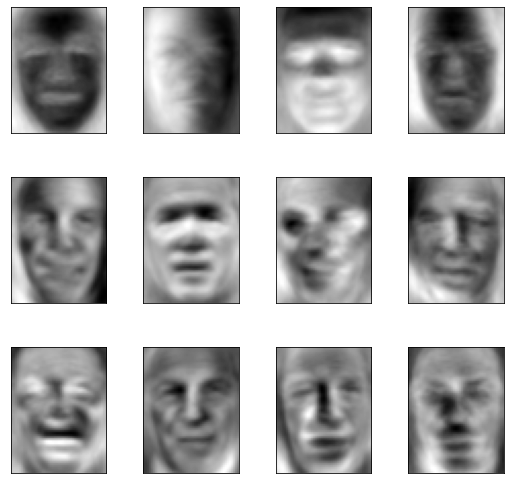

In [22]:
eigenvectors = np.reshape(eigenvectors,(eigenvectors.shape[0],X.shape[1],X.shape[2]))
print("eigenvectors_shape: {}".format(eigenvectors.shape))

plot_gallery(eigenvectors)

Bien que nous puissions certainement pas comprendre tous les aspects de ces composantes, il est tout de meme possible de se faire une idée de ce qu'elles capturent pour certaines d'entres elles. Elles peuvent encoder le contraste entre le visage et l'arriere plan, les différences d'éclairage entre la moitier gauche et la moitier droite ...
Cette representation est un peu plus significative d'un point de vue sémantique que les valeurs brutes des pixels,mais elle reste tout de meme assez loin de la manière dont un etre humain pourrait percevoir un visage.


La méthode PCA s'agit d'une transformation dans laquelle les données subissent une rotation, les composantes ayant une faible variance étant ensuite abandonnes. Une autre interprétation utilse consiste à essayer de trouver certains nombres de manière à pouvoir exprimer les points detest sous la forme d'une somme pondérée des composantesprincipales.

3. On souhaite comprimer les images de X_test afin de les transmettre en utilisant le moins
de bande passante possible. Pour cela, les 50 images propres sont transmises une fois.
Pour chaque nouvelle image, on transmet uniquement ses composantes dans le nouveau
système d’axe de dimension 50. L’image est ensuite reconstruite à l’arrivée.
Appliquer l’ACP des images de X_test (X_testC)

4. Reconstruisez les images à partir X_testC pour obtenir les images X_testR à partir d’une
des méthodes de PCA(). Afficher les images reconstruites et les comparer visuellement
aux images de départ.


Une autre façon d'essayer de comprendre ce que fait un modèle PCA consiste à regarder la reconstruction des données originales en ne se servant seulement que de ceratines composantes.
Ce retour à l'espace des caractéristiques originales peut etre réalisé en faisant appel à la méthode inverse_transform.

Nous visualisant la reconstruction de quelques visages en utilisant successivement 10, 50, 100 et 500 composantes.

X :  (1288, 62, 47)
X_test :  (322, 2914)
X_Test_pca3 :  (322, 50)
X_test_reconstruit :  (322, 2914)
X_test_reconstruit_reshape :  (322, 62, 47)


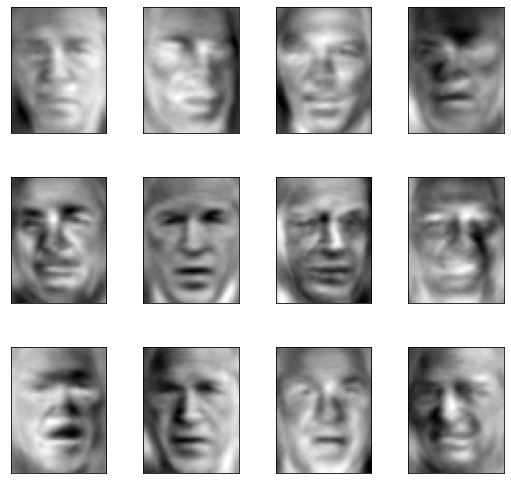

In [35]:
# On va travailler principalement sur la base de tests
print("X : ", X.shape)
print("X_test : ", X_test.shape)
print("X_Test_pca3 : ", X_test_pca3.shape)

X_test_reconstruit = pca3.inverse_transform(X_test_pca3)
print("X_test_reconstruit : ", X_test_reconstruit.shape)

X_test_reconstruit_reshape = np.reshape(X_test_reconstruit,(X_test.shape[0],X.shape[1],X.shape[2]))
print("X_test_reconstruit_reshape : ", X_test_reconstruit_reshape.shape)

plot_gallery(X_test_reconstruit_reshape)

X :  (1288, 62, 47)
X_test :  (322, 2914)
X_Test_pca3 :  (322, 50)
X_test_reconstruit :  (322, 2914)
X_test_reconstruit_scaled_2 :  (322, 2914)
X_test_reconstruit_reshape :  (322, 62, 47)


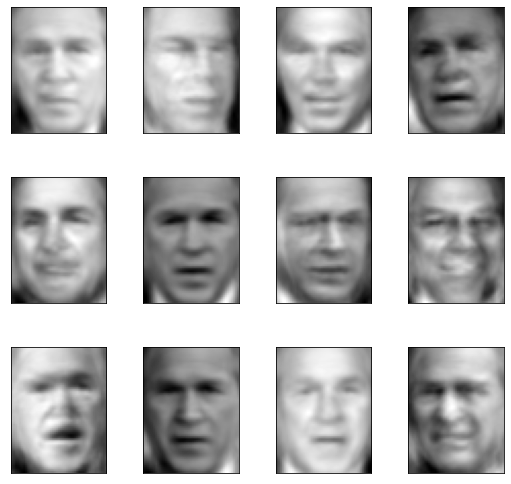

In [41]:
""" On va faire la trans inverse avec pca + scaler"""
# On va travailler principalement sur la base de tests

print("X : ", X.shape)
print("X_test : ", X_test.shape)
print("X_Test_pca3 : ", X_test_pca3.shape)

X_test_reconstruit2 = pca3.inverse_transform(X_test_pca3)
print("X_test_reconstruit : ", X_test_reconstruit.shape)

X_test_reconstruit_scaled_2 = scaler.inverse_transform(X_test_reconstruit2)
print("X_test_reconstruit_scaled_2 : ", X_test_reconstruit_scaled_2.shape)

X_test_reconstruit_reshape_2 = np.reshape(X_test_reconstruit_scaled_2,(X_test.shape[0],X.shape[1],X.shape[2]))
print("X_test_reconstruit_reshape : ", X_test_reconstruit_reshape_2.shape)

plot_gallery(X_test_reconstruit_reshape_2)

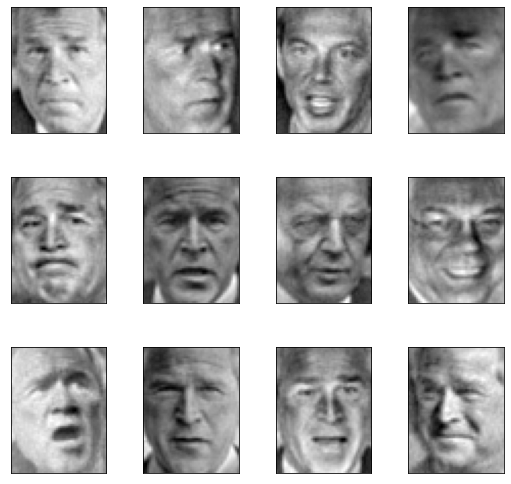

In [32]:
""" Maintenenat On augmente le nombre de componenets"""
pca4 = PCA(n_components=966)
pca4.fit(X_train)
X_test_pca4=pca4.transform(X_test)

""" On va faire la trans inverse avec seulement pca"""
# On va travailler principalement sur la base de tests
X_test_reconstruit_4 = pca4.inverse_transform(X_test_pca4)
X_test_reconstruit_reshape_4 = np.reshape(X_test_reconstruit_4,(X_test.shape[0],X.shape[1],X.shape[2]))

plot_gallery(X_test_reconstruit_reshape_4)

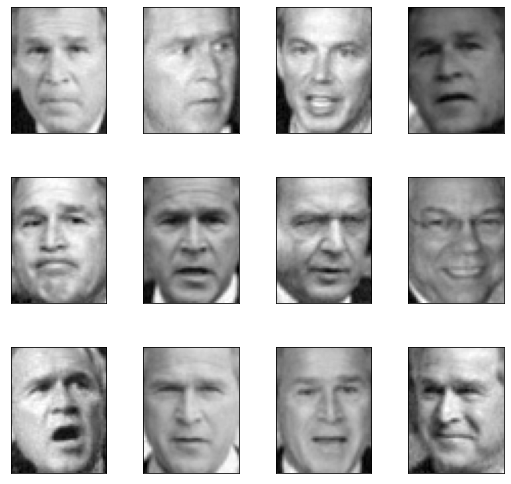

In [33]:
""" On va faire la trans inverse avec pca + scaler"""
# On va travailler principalement sur la base de tests
X_test_reconstruit_4 = pca4.inverse_transform(X_test_pca4)
X_test_reconstruit_scaled_4 = scaler.inverse_transform(X_test_reconstruit_4)
X_test_reconstruit_reshape_4 = np.reshape(X_test_reconstruit_scaled_4,(X_test.shape[0],X.shape[1],X.shape[2]))

plot_gallery(X_test_reconstruit_reshape_4)

In [27]:
E= (X_test_reconstruit_scaled_4-X_test)**2
E = np.mean(np.sqrt(np.sum(E,axis=0)))
print(E)


2454.3398


6. Faire varier le nombre de composantes conservées de 10 à 950 par pas de 50 et calculer
l’erreur de reconstruction. Afficher l’erreur de reconstruction en fonction du nombre de
composantes.

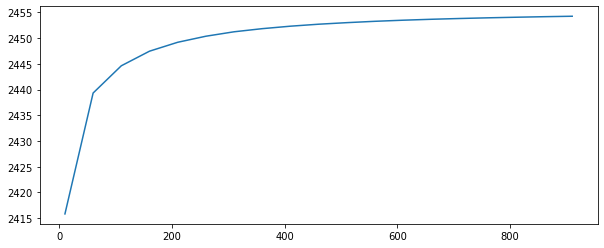

In [48]:
ErreurDeReconstruction = []
components = range(10, 950, 50)

for nbComponents in components:
  pca_i  = PCA(nbComponents)  #Instanciate PCA
  pca_i.fit(X_train)

  X_test_pca_i = pca_i.transform(X_test)
  X_test_reconstruit_i = pca_i.inverse_transform(X_test_pca_i)
  X_test_reconstruit_scaled_i = scaler.inverse_transform(X_test_reconstruit_i)
  X_test_reconstruit_reshape_i = np.reshape(X_test_reconstruit_scaled_i,(X_test.shape[0],X.shape[1],X.shape[2]))

  E= (X_test_reconstruit_scaled_i - X_test)**2
  E = np.mean(np.sqrt(np.sum(E,axis=0)))
  ErreurDeReconstruction.append(E)

plt.figure(figsize=(10, 4))
plt.plot(components,ErreurDeReconstruction )
